In [1]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core  import Dense

Using TensorFlow backend.


In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test =x_test.reshape((x_test.shape[0], 28, 28, 1))
y_test1=y_test

In [7]:
x_train=x_train/255
x_test=x_test/255
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [8]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
# 	INPUT => CONV => RELU => POOL => CONV => RELU => POOL => FC => RELU => FC

model = Sequential()


        # first set of CONV => RELU => POOL
model.add(Conv2D(20, 5, padding="same",input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # second set of CONV => RELU => POOL
model.add(Conv2D(50, 5, 5, border_mode="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # set of FC => RELU layers
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

        # softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))

        





C:\Users\STUDENT\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, (5, 5), padding="same")`
  # This is added back by InteractiveShellApp.init_path()


In [12]:


model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

results=model.fit(x_train,y_train,batch_size=128,epochs=2,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 311s 5ms/step - loss: 0.1547 - acc: 0.9544 - val_loss: 0.0424 - val_acc: 0.9856
Epoch 2/2
60000/60000 [==============================] - 292s 5ms/step - loss: 0.0441 - acc: 0.9862 - val_loss: 0.0297 - val_acc: 0.9893


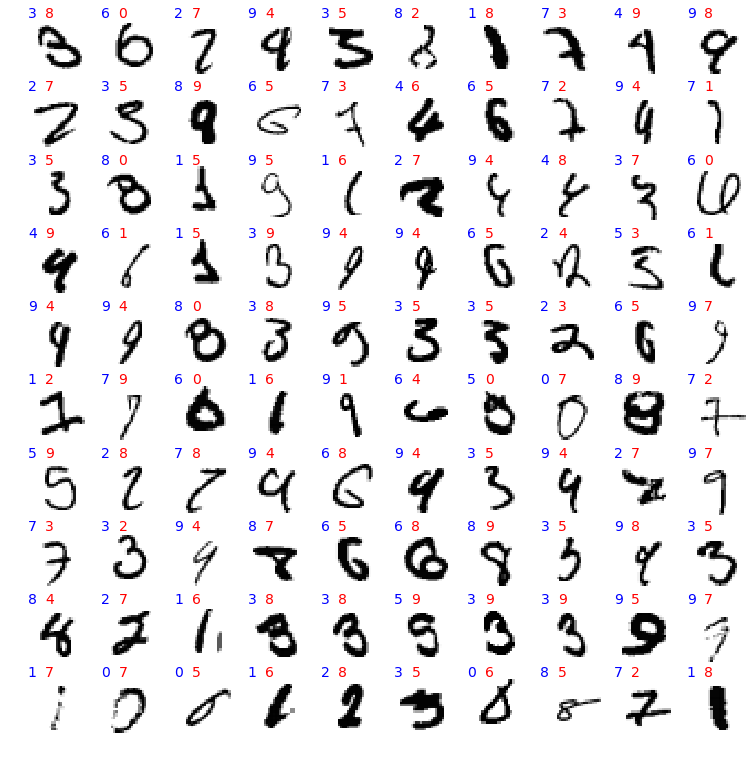

In [14]:
#missclassified examples
import numpy as np
import matplotlib.pyplot as plt
y_hat = model.predict_classes(x_test)

test_wrong = [im for im in zip(x_test,y_hat,y_test1) if im[1]!=im[2]]

plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28)) # subtracted to change color i did it below
    plt.axis("off")
    plt.text(0, 0,val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

In [15]:
print("lenght of missclssified:",len(test_wrong))

lenght of missclssified: 107


In [16]:
y_hat = model.predict_classes(x_test)



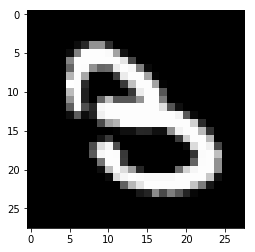

In [18]:

for ind, val in enumerate(test_wrong[:1]):
    
    #print(val)
    im = 1 - val[0].reshape((28,28))
    plt.imshow(val[0].reshape((28,28)), cmap='gray')
    

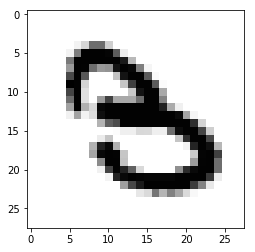

In [19]:
for ind, val in enumerate(test_wrong[:1]):
    
    
    im = 1 - val[0].reshape((28,28))
    plt.imshow(im, cmap='gray')
    